In [23]:
# importing packages
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, PrecisionRecallDisplay, precision_score, recall_score,confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
np.random.seed(32)

     feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0           5         1         1         1         2         1         3   
1           5         4         4         5         7        10         3   
2           3         1         1         1         2         2         3   
3           6         8         8         1         3         4         3   
4           4         1         1         3         2         1         3   
..        ...       ...       ...       ...       ...       ...       ...   
695         2         1         1         1         2         1         1   
696         5        10        10         3         7         3         8   
697         4         8         6         4         3         4        10   
698         4         8         8         5         4         5        10   
699         3         1         1         1         2         1         3   

     feature8  featue9  class  
0           1        1      0  
1          

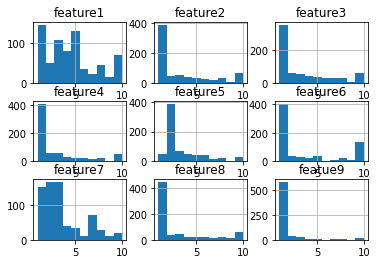

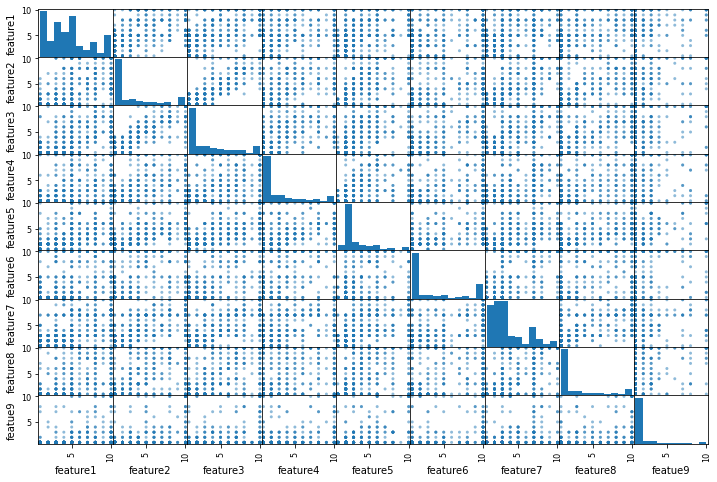

In [86]:
data = pd.read_csv("./dataset_assignment1.csv")
print(data)
data.iloc[:, :-1].hist()
scatter_matrix(data.iloc[:, :-1], figsize = (12, 8))
data = data.to_numpy()
data_class1 = data[data[:, -1] == 1]
data_class2 = data[data[:, -1] == 0]
# Statistical description 
print(f"mean for class 1 is {np.mean(data_class1[:, :-1])}")
print(f"mean for class 2 is {np.mean(data_class2[:, :-1])}")
print(f"standard deviation for class 1 is {np.std(data_class1[:, :-1])}")
print(f"standard deviation for class 2 is {np.std(data_class2[:, :-1])}")
for feature in range(data.shape[1]):
    print(f"mean of feature {feature + 1} for class1 is {np.mean(data_class1[:, feature])}")
    print(f"standard deviation of feature {feature + 1 + 1} for class 1 is {np.std(data_class1[:, feature])}")
    print(f"maximum value of feature {feature + 1} for class 1 is {np.max(data_class1[:, feature])}")
    print(f"minimum value of feature {feature + 1} for class 1 is {np.min(data_class1[:, feature])}\n")
    print(f"mean of feature {feature + 1} for class2 is {np.mean(data_class2[:, feature])}")
    print(f"standard deviation of feature {feature + 1} for class 2 is {np.std(data_class2[:, feature])}")
    print(f"maximum value of feature {feature + 1} for class 2 is {np.max(data_class2[:, feature])}")
    print(f"minimum value of feature {feature + 1} for class 2 is {np.min(data_class2[:, feature])}\n")
print(f"maximum value for class 1 is {np.max(data_class1[:, :-1])}")
print(f"maximum value for class 2 is {np.max(data_class2[:, :-1])}")
print(f"minimum value for class 1 is {np.min(data_class1[:, :-1])}")
print(f"minimum value for class 2 is {np.min(data_class2[:, :-1])}")
print(f"number of samples for class 0 are {len(data[data[:, -1] == 0])}")
print(f"number of samples for class 1 are {len(data[data[:, -1] == 1])}")
# splitting the dataset
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 32)
X_train = train_data[:, :-1]
y_train = train_data[:, -1]
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Classification Methods

In [76]:
scoring_criteria = ['precision', 'recall', 'accuracy', 'f1']
# funciton that Visualizes and tunes hyperparameters
def visualize_grid(model, param_grid ,param_list, scoring_criteria = scoring_criteria):
    table = []
    for score in scoring_criteria:
        # making a separate scoring rule for precision to avoid division with zero
        if score == 'precision':
            score = make_scorer(precision_score, zero_division=1)
        # applying gridsearch which used K-Fold cross validation to tune the hyperparameters
        grid = GridSearchCV(model, param_grid = param_grid, cv = 5, verbose = 0, n_jobs = -1, scoring = score)
        grid.fit(X_train, y_train)
        table.append(grid.best_params_.values())
        print(f"the best hyper parameters using {score} are {grid.best_params_}")
        for param in param_list:
            results = pd.DataFrame(grid.cv_results_)
            results.sort_values(param, inplace = True)
            plt.bar(results[param], results['mean_test_score'])
            plt.xlabel(param)
            plt.ylabel(score)
            plt.show()
    # showing the results as a Dataframe or tables
    df = pd.DataFrame(table, columns = [param_list], index = [scoring_criteria])
    return df

# Random Forest 

accuracy is: 0.9428571428571428
f1 score is: 0.92
precision is: 0.92
recall is :0.92


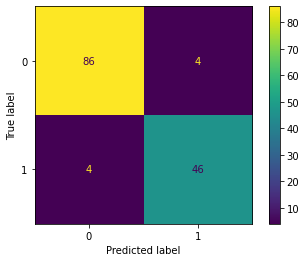

In [79]:
forest = RandomForestClassifier(max_depth = 3, max_features = 'sqrt', max_leaf_nodes = 6, n_estimators = 150,random_state = 32)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
print(f"accuracy is: {accuracy_score(y_test, forest_pred)}")
print(f"f1 score is: {f1_score(y_test, forest_pred)}")
print(f"precision is: {precision_score(y_test, forest_pred)}")
print(f"recall is :{recall_score(y_test, forest_pred)}")
confusion_forest = confusion_matrix(y_test, forest_pred, labels = forest.classes_)
graph_forest = ConfusionMatrixDisplay(confusion_matrix= confusion_forest,
                              display_labels=forest.classes_)
graph_forest.plot()
plt.show()

## Hyperparameter Tuning for Random forest

the best hyper parameters using make_scorer(precision_score, zero_division=1) are {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 150}


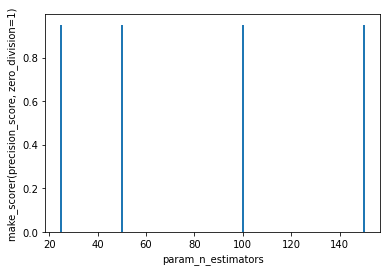

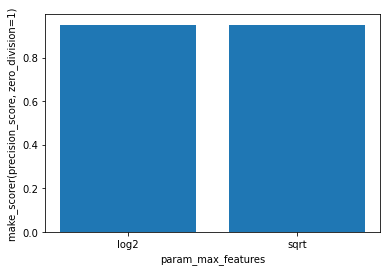

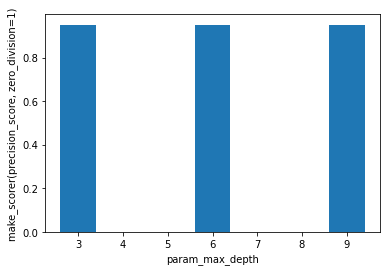

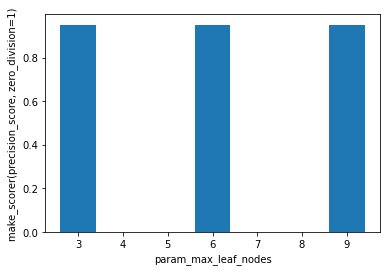

the best hyper parameters using recall are {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 150}


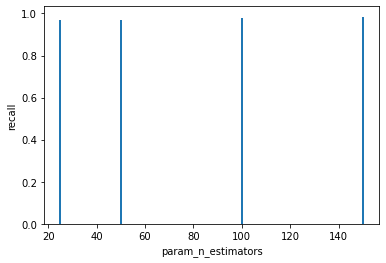

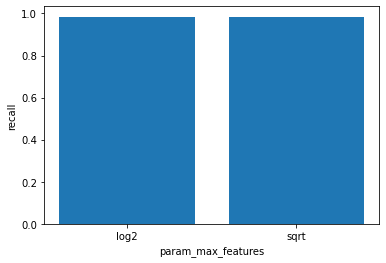

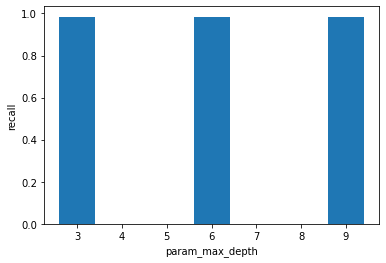

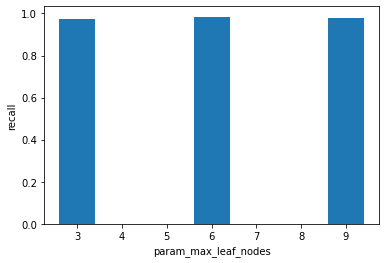

the best hyper parameters using accuracy are {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 150}


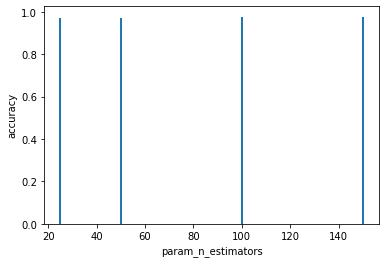

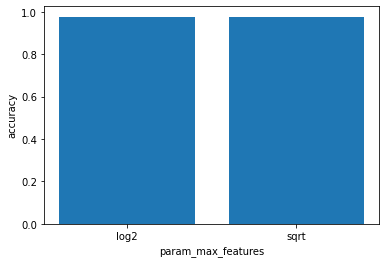

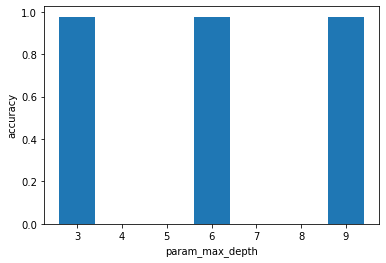

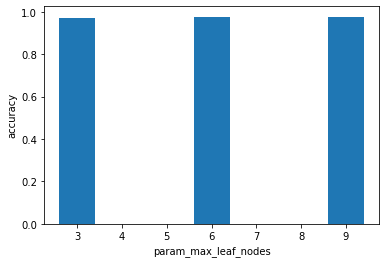

the best hyper parameters using f1 are {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 150}


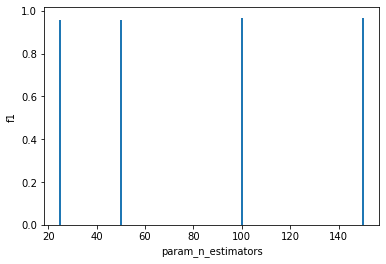

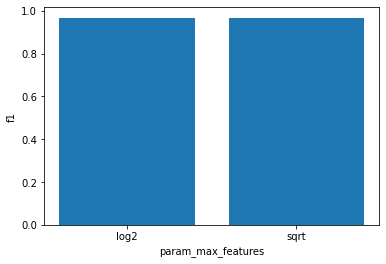

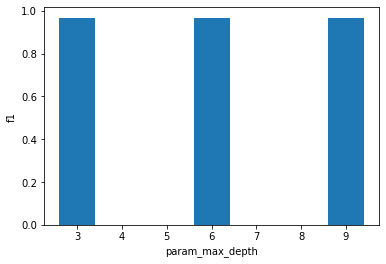

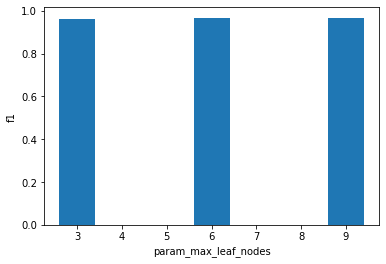

,param_n_estimators,param_max_features,param_max_depth,param_max_leaf_nodes
precision,3,sqrt,6,150
recall,3,sqrt,6,150
accuracy,3,sqrt,6,150
f1,3,sqrt,6,150


In [80]:
param_dict_forest= {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
param_forest = ['param_n_estimators', 'param_max_features', 'param_max_depth', 'param_max_leaf_nodes']
best_forest = visualize_grid(forest, param_dict_forest, param_forest)
best_forest

# Support Vector Machine

accuracy is: 0.9
f1 score is: 0.8771929824561403
precision is: 0.78125
recall is :1.0


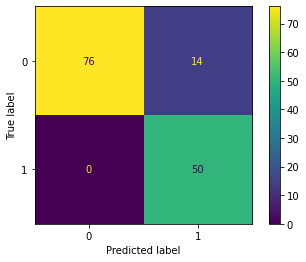

In [81]:
svc = SVC(C = 100, gamma = 1, kernel = 'rbf', random_state = 32)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print(f"accuracy is: {accuracy_score(y_test, svc_pred)}")
print(f"f1 score is: {f1_score(y_test, svc_pred)}")
print(f"precision is: {precision_score(y_test, svc_pred)}")
print(f"recall is :{recall_score(y_test, svc_pred)}")
confusion_svc = confusion_matrix(y_test, svc_pred, labels = svc.classes_)
graph_svc = ConfusionMatrixDisplay(confusion_matrix= confusion_svc,
                              display_labels=svc.classes_)
graph_svc.plot()
plt.show()

## Hyperparameter Tuning for Support Vector Machine

the best hyper parameters using make_scorer(precision_score, zero_division=1) are {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


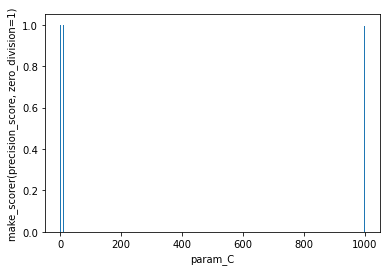

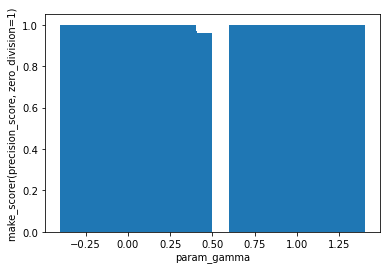

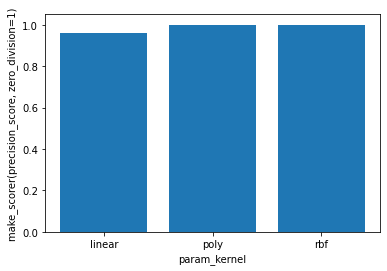

the best hyper parameters using recall are {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


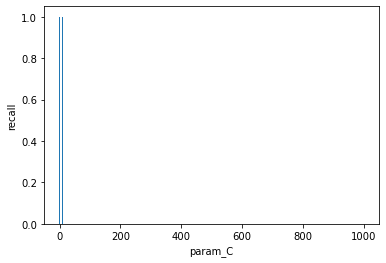

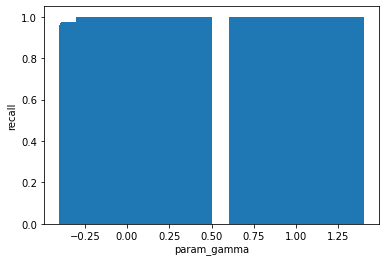

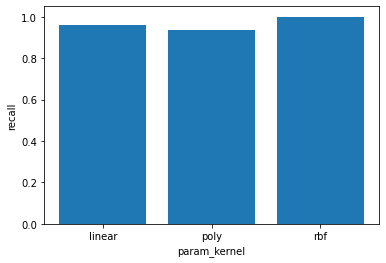

the best hyper parameters using accuracy are {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


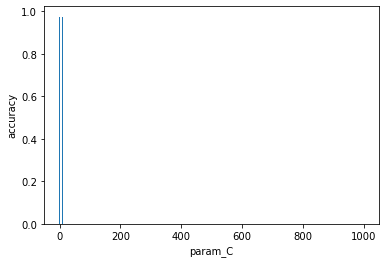

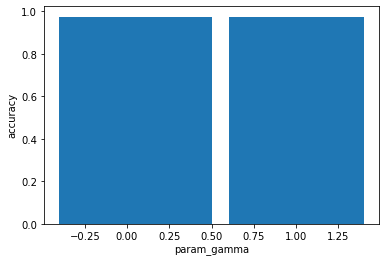

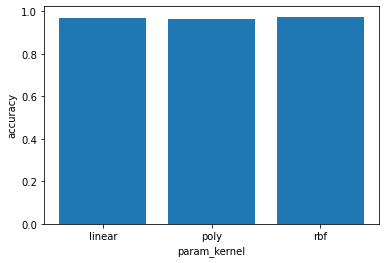

the best hyper parameters using f1 are {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


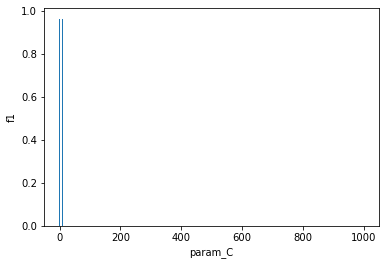

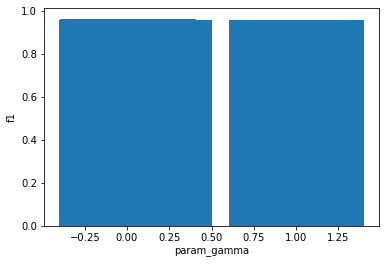

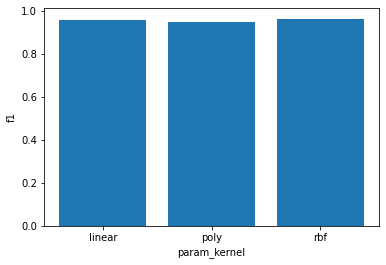

,param_C,param_gamma,param_kernel
precision,0.1,1.000,rbf
recall,0.1,0.100,rbf
accuracy,100.0,0.001,rbf
f1,100.0,0.001,rbf


In [82]:
param_dict_svc = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', "linear", "poly"]
                 }
param_svc = ['param_C', "param_gamma", "param_kernel"]
best_svc = visualize_grid(svc, param_dict_svc, param_svc)
best_svc

# KNN

accuracy is: 0.9357142857142857
f1 score is: 0.9090909090909091
precision is: 0.9183673469387755
recall is :0.9


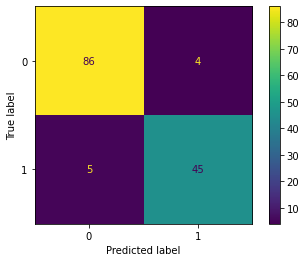

In [83]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(f"accuracy is: {accuracy_score(y_test, knn_pred)}")
print(f"f1 score is: {f1_score(y_test, knn_pred)}")
print(f"precision is: {precision_score(y_test, knn_pred)}")
print(f"recall is :{recall_score(y_test, knn_pred)}")
confusion_knn = confusion_matrix(y_test, knn_pred, labels = knn.classes_)
graph_knn = ConfusionMatrixDisplay(confusion_matrix= confusion_knn,
                              display_labels=knn.classes_)
graph_knn.plot()
plt.show()

## Hyperparameter Tuning for KNN

the best hyper parameters using make_scorer(precision_score, zero_division=1) are {'n_neighbors': 2}


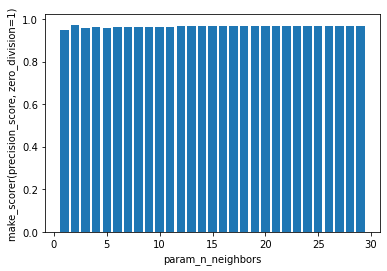

the best hyper parameters using recall are {'n_neighbors': 7}


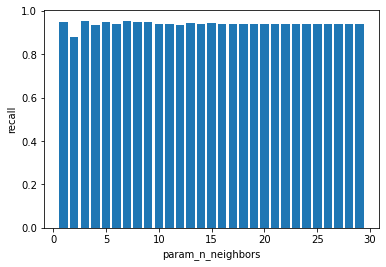

the best hyper parameters using accuracy are {'n_neighbors': 7}


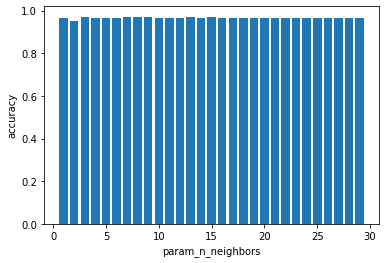

the best hyper parameters using f1 are {'n_neighbors': 7}


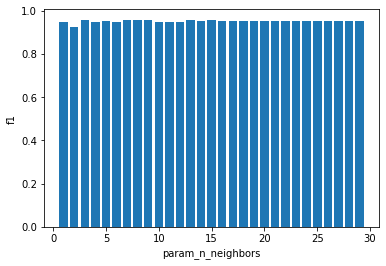

,param_n_neighbors
precision,2
recall,7
accuracy,7
f1,7


In [84]:
k_list = list(range(1, 30))
param_dict_knn = dict(n_neighbors=k_list)
param_knn = ['param_n_neighbors']
best_knn = visualize_grid(knn, param_dict_knn, param_knn)
best_knn